In [175]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# import binomial test
from scipy.stats import binomtest
from statsmodels.stats.multitest import multipletests


# needed for editable text in svg format
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'

# import homemade functions:
from MAPseq_processing import *
from MAPseq_plotting import *

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp, green_it_cmp, purple_pt_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set-up variables, import data

In [5]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'
# out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'
out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"

#### load data - OMC
omc_bin = pd.read_pickle(in_path+"M194_M220_OMC_bin4.pkl")


# Preprocessing of data

In [11]:
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]

# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]

# seperate pt cells
omc_pt = [df[df['type']=="PT"] for df in omc_type]

# seperate then concatenate by species
# it cells
mm_it = [omc_it[i] for i in range(len(omc_it)) if metadata.loc[i,"species"]=="MMus"]
st_it = [omc_it[i] for i in range(len(omc_it)) if metadata.loc[i,"species"]=="STeg"]
mm_it_all = pd.concat(mm_it).reset_index(drop=True)
st_it_all = pd.concat(st_it).reset_index(drop=True)
# pt cells
mm_pt = [omc_pt[i] for i in range(len(omc_pt)) if metadata.loc[i,"species"]=="MMus"]
st_pt = [omc_pt[i] for i in range(len(omc_pt)) if metadata.loc[i,"species"]=="STeg"]
mm_pt_all = pd.concat(mm_pt).reset_index(drop=True)
st_pt_all = pd.concat(st_pt).reset_index(drop=True)



# IT Cells

In [12]:
plot_areas = ["OMCc", "AUD", "STR"]
motifs = df_to_motif_proportion(st_it_all, areas=plot_areas).index
motif_strings = TF_to_motifs(motifs)

## compare steg and mmus AUD motif proportions

In [13]:
# subset aud cells and motifs
st_aud = st_it_all[st_it_all["AUD"]>0]
mm_aud = mm_it_all[mm_it_all["AUD"]>0]
aud_strings = [string for string in motif_strings if "AUD" in string]


st_obs_motifs = df_to_motif_proportion(st_aud, areas=plot_areas, subset="AUD")
mm_obs_motifs = df_to_motif_proportion(mm_aud, areas=plot_areas, subset="AUD")



/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:494: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_s = plot_s[idx]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:494: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_s = plot_s[idx]


In [81]:
# what is overlap between AUD/STR
print("STEG")
print("all AUD", st_aud.shape[0])
print("AUD and STR", st_aud[st_aud["STR"]>0].shape[0])
print("AUD_STR/AUD", st_aud[st_aud["STR"]>0].shape[0]/st_aud.shape[0])
print("\n")

# what is overlap between OMCc/STR
st_omcc = st_it_all[st_it_all["OMCc"]>0]
print("all OMCc", st_omcc.shape[0])
print("OMCc and STR", st_omcc[st_omcc["STR"]>0].shape[0])
print("OMCc_STR/AUD", st_omcc[st_omcc["STR"]>0].shape[0]/st_omcc.shape[0])
print("\n")

print("MMus")
print("all AUD", mm_aud.shape[0])
print("AUD and STR", mm_aud[mm_aud["STR"]>0].shape[0])
print("AUD_STR/AUD", mm_aud[mm_aud["STR"]>0].shape[0]/mm_aud.shape[0])
print("\n")

# what is overlap between OMCc/STR
mm_omcc = mm_it_all[mm_it_all["OMCc"]>0]
print("all OMCc", mm_omcc.shape[0])
print("OMCc and STR", mm_omcc[mm_omcc["STR"]>0].shape[0])
print("OMCc_STR/AUD", mm_omcc[mm_omcc["STR"]>0].shape[0]/mm_omcc.shape[0])
print("\n")

STEG
all AUD 556
AUD and STR 358
AUD_STR/AUD 0.6438848920863309


all OMCc 2999
OMCc and STR 2416
OMCc_STR/AUD 0.8056018672890963


MMus
all AUD 2098
AUD and STR 1918
AUD_STR/AUD 0.9142040038131554


all OMCc 41736
OMCc and STR 36845
OMCc_STR/AUD 0.8828110024918535




/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_3702/1176548771.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0].bar("MMus", mm_obs_motifs[i], bottom=mm_obs_motifs[0:i].sum(),
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_3702/1176548771.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[1].bar("STeg", st_obs_motifs[i], bottom=st_obs_motifs[0:i].sum(),


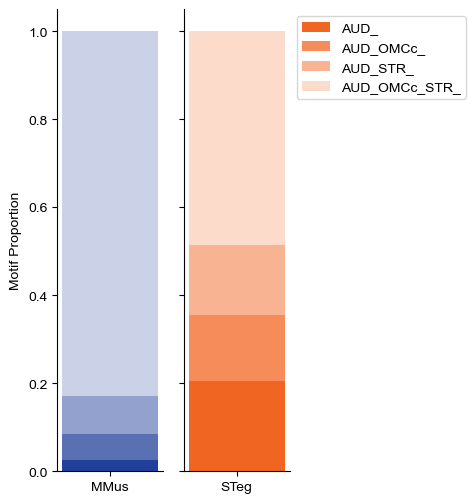

In [14]:
# create data

fig, axs = plt.subplots(figsize=(3,6), ncols=2, sharey=True)
 
# plot bars in stack manner
for i in range(len(mm_obs_motifs)):
    axs[0].bar("MMus", mm_obs_motifs[i], bottom=mm_obs_motifs[0:i].sum(), 
               color=blue_cmp.colors[255-i*65])
    
for i in range(len(st_obs_motifs)):
    axs[1].bar("STeg", st_obs_motifs[i], bottom=st_obs_motifs[0:i].sum(), 
               color=orange_cmp.colors[255-i*65])

axs[0].spines[["right", "top"]].set_visible(False)
axs[1].spines[["right", "top"]].set_visible(False)


axs[0].set_ylabel("Motif Proportion")
plt.legend(aud_strings, bbox_to_anchor=[1,1])
plt.show()

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_3702/3805511118.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0].bar("MMus", mm_obs_motifs[i], bottom=mm_obs_motifs[0:i].sum(),
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_3702/3805511118.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[1].bar("STeg", st_obs_motifs[i], bottom=st_obs_motifs[0:i].sum(),


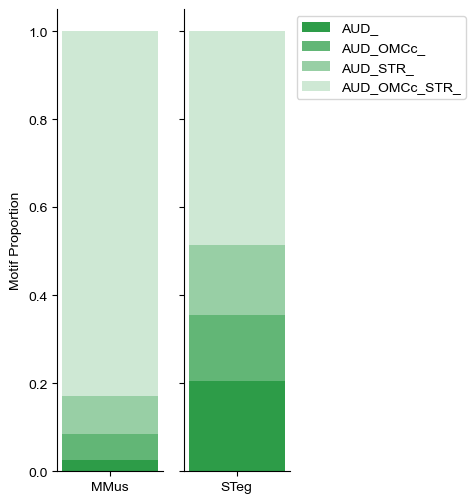

In [15]:
# different colormap

fig, axs = plt.subplots(figsize=(3,6), ncols=2, sharey=True)
 
# plot bars in stack manner
for i in range(len(mm_obs_motifs)):
    axs[0].bar("MMus", mm_obs_motifs[i], bottom=mm_obs_motifs[0:i].sum(), 
               color=green_it_cmp.colors[255-i*65])
    
for i in range(len(st_obs_motifs)):
    axs[1].bar("STeg", st_obs_motifs[i], bottom=st_obs_motifs[0:i].sum(), 
               color=green_it_cmp.colors[255-i*65])

axs[0].spines[["right", "top"]].set_visible(False)
axs[1].spines[["right", "top"]].set_visible(False)


axs[0].set_ylabel("Motif Proportion")
plt.legend(aud_strings, bbox_to_anchor=[1,1])
plt.show()

In [190]:
it_motifs_df

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species,fc,log2fc,pvalue,p<0.01?,nlog10p,bf_pvals,nlog10_bfp
0,OMCc_,3642,3794,499,0.131523,0.150962,STeg,0.871233,-0.198870,7.255567e-04,True,3.139329,1.015779e-02,1.993201
1,AUD_,3642,3794,114,0.030047,0.006872,STeg,4.372702,2.128525,2.397358e-37,True,36.620267,3.356301e-36,35.474139
2,STR_,3642,3794,441,0.116236,0.138815,STeg,0.837344,-0.256107,4.353684e-05,True,4.361143,6.095158e-04,3.215015
3,AUD_OMCc_,3642,3794,84,0.022140,0.025922,STeg,0.854112,-0.227502,1.523666e-01,False,0.817110,1.000000e+00,-0.000000
4,OMCc_STR_,3642,3794,2146,0.565630,0.523657,STeg,1.080154,0.111237,2.323130e-07,True,6.633927,3.252382e-06,5.487799
5,AUD_STR_,3642,3794,88,0.023195,0.023836,STeg,0.973083,-0.039364,8.730539e-01,False,0.058959,1.000000e+00,-0.000000
6,AUD_OMCc_STR_,3642,3794,270,0.071165,0.089918,STeg,0.791447,-0.337435,3.379957e-05,True,4.471089,4.731939e-04,3.324961
7,OMCc_,53315,54784,4764,0.086960,0.085764,MMus,1.013939,0.019971,3.176043e-01,False,0.498114,1.000000e+00,-0.000000
8,AUD_,53315,54784,53,0.000967,0.001068,MMus,0.906093,-0.142269,5.130857e-01,False,0.289810,1.000000e+00,-0.000000
9,STR_,53315,54784,11347,0.207123,0.202238,MMus,1.024152,0.034429,4.511195e-03,True,2.345708,6.315672e-02,1.199580


## analyze via idependence

In [16]:
sp_it_all = [st_it_all, mm_it_all]
sp = ["STeg", "MMus"]

# Estimate n-totals
n_totals = [estimate_n_total(sp_it_all[i], plot_areas) for i in range(len(sp_it_all))]

# Count obs motifs
n_obs_motifs = [df_to_motif_proportion(df, areas=plot_areas, proportion=False) for df in sp_it_all]
motifs = n_obs_motifs[0].index

# convert to proportions using adjusted n_totals
p_obs_motifs = [n_obs_motifs[i]/n_totals[i] for i in range(len(n_totals))]

# calculate proportions based on independent bulk probabilities adjusted for n_total
p_calc_motifs = [df_to_calc_pab_proportions(df, motifs, adjust_total=True) for df in sp_it_all]

motif_strings = TF_to_motifs(motifs)

# put into dataframe - note p_obs is adjusted for n_total
it_motifs_df = []
for i in range(len(n_totals)):
    df = pd.DataFrame({"motifs":motif_strings, "n_shape":sp_it_all[i].shape[0], "n_total":n_totals[i],
                  "n_obs":n_obs_motifs[i], "p_obs":p_obs_motifs[i], "p_calc":p_calc_motifs[i],
                  "species":sp[i]})
    it_motifs_df.append(df)
it_motifs_df = pd.concat(it_motifs_df).reset_index(drop=True)

it_motifs_df

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
0,OMCc_,3642,3794,499,0.131523,0.150962,STeg
1,AUD_,3642,3794,114,0.030047,0.006872,STeg
2,STR_,3642,3794,441,0.116236,0.138815,STeg
3,AUD_OMCc_,3642,3794,84,0.022140,0.025922,STeg
4,OMCc_STR_,3642,3794,2146,0.565630,0.523657,STeg
5,AUD_STR_,3642,3794,88,0.023195,0.023836,STeg
6,AUD_OMCc_STR_,3642,3794,270,0.071165,0.089918,STeg
7,OMCc_,53315,54784,4764,0.086960,0.085764,MMus
8,AUD_,53315,54784,53,0.000967,0.001068,MMus
9,STR_,53315,54784,11347,0.207123,0.202238,MMus


In [17]:
# calculate obs/expected fold change
it_motifs_df["fc"] = it_motifs_df["p_obs"]/it_motifs_df["p_calc"]
it_motifs_df["log2fc"] = np.log2(it_motifs_df["fc"])

# calculate p-value
for i in range(it_motifs_df.shape[0]):
    test = binomtest(it_motifs_df.loc[i,"n_obs"], it_motifs_df.loc[i,"n_total"], 
                     it_motifs_df.loc[i,"p_calc"])
    pvalue = test.pvalue
    it_motifs_df.loc[i, "pvalue"] = pvalue

it_motifs_df["p<0.01?"] = it_motifs_df["pvalue"]<0.01

it_motifs_df["nlog10p"] = -1*np.log10(it_motifs_df["pvalue"])

it_motifs_df

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species,fc,log2fc,pvalue,p<0.01?,nlog10p
0,OMCc_,3642,3794,499,0.131523,0.150962,STeg,0.871233,-0.198870,7.255567e-04,True,3.139329
1,AUD_,3642,3794,114,0.030047,0.006872,STeg,4.372702,2.128525,2.397358e-37,True,36.620267
2,STR_,3642,3794,441,0.116236,0.138815,STeg,0.837344,-0.256107,4.353684e-05,True,4.361143
3,AUD_OMCc_,3642,3794,84,0.022140,0.025922,STeg,0.854112,-0.227502,1.523666e-01,False,0.817110
4,OMCc_STR_,3642,3794,2146,0.565630,0.523657,STeg,1.080154,0.111237,2.323130e-07,True,6.633927
5,AUD_STR_,3642,3794,88,0.023195,0.023836,STeg,0.973083,-0.039364,8.730539e-01,False,0.058959
6,AUD_OMCc_STR_,3642,3794,270,0.071165,0.089918,STeg,0.791447,-0.337435,3.379957e-05,True,4.471089
7,OMCc_,53315,54784,4764,0.086960,0.085764,MMus,1.013939,0.019971,3.176043e-01,False,0.498114
8,AUD_,53315,54784,53,0.000967,0.001068,MMus,0.906093,-0.142269,5.130857e-01,False,0.289810
9,STR_,53315,54784,11347,0.207123,0.202238,MMus,1.024152,0.034429,4.511195e-03,True,2.345708


In [33]:
from statsmodels.stats.multitest import multipletests
bonferroni = multipletests(it_motifs_df["pvalue"], alpha=0.01, method="bonferroni")
it_motifs_df["bf_pvals"] = bonferroni[1]
it_motifs_df["nlog10_bfp"] = -1*np.log10(it_motifs_df["bf_pvals"])
it_motifs_df

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species,fc,log2fc,pvalue,p<0.01?,nlog10p,bf_pvals,nlog10_bfp
0,OMCc_,3642,3794,499,0.131523,0.150962,STeg,0.871233,-0.198870,7.255567e-04,True,3.139329,1.015779e-02,1.993201
1,AUD_,3642,3794,114,0.030047,0.006872,STeg,4.372702,2.128525,2.397358e-37,True,36.620267,3.356301e-36,35.474139
2,STR_,3642,3794,441,0.116236,0.138815,STeg,0.837344,-0.256107,4.353684e-05,True,4.361143,6.095158e-04,3.215015
3,AUD_OMCc_,3642,3794,84,0.022140,0.025922,STeg,0.854112,-0.227502,1.523666e-01,False,0.817110,1.000000e+00,-0.000000
4,OMCc_STR_,3642,3794,2146,0.565630,0.523657,STeg,1.080154,0.111237,2.323130e-07,True,6.633927,3.252382e-06,5.487799
5,AUD_STR_,3642,3794,88,0.023195,0.023836,STeg,0.973083,-0.039364,8.730539e-01,False,0.058959,1.000000e+00,-0.000000
6,AUD_OMCc_STR_,3642,3794,270,0.071165,0.089918,STeg,0.791447,-0.337435,3.379957e-05,True,4.471089,4.731939e-04,3.324961
7,OMCc_,53315,54784,4764,0.086960,0.085764,MMus,1.013939,0.019971,3.176043e-01,False,0.498114,1.000000e+00,-0.000000
8,AUD_,53315,54784,53,0.000967,0.001068,MMus,0.906093,-0.142269,5.130857e-01,False,0.289810,1.000000e+00,-0.000000
9,STR_,53315,54784,11347,0.207123,0.202238,MMus,1.024152,0.034429,4.511195e-03,True,2.345708,6.315672e-02,1.199580


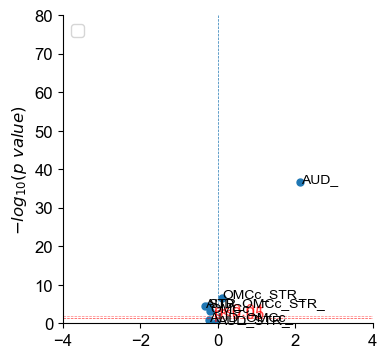

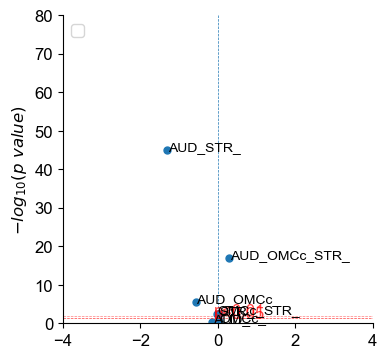

In [37]:
# plot as volcano plot

for spec in sp:
    plot_volcano(it_motifs_df[it_motifs_df["species"]==spec].reset_index(drop=True), 
                 x="log2fc", y="nlog10p",
                labels="motifs", xlim=(-4,4), ylim = (0,80))
    # plt.axline((-1,bf5), (1,bf5), color="red", linestyle="--")
    # plt.text(-3, bf5+1, "bf 0.05")
    # plt.axline((-1,bf1), (1,bf1), color="red", linestyle="--")
    # plt.text(-3, bf5+1, "bf 0.01")
    # plt.title(spec)
    plt.show()

# PT neurons

## Explore amygdala population

In [46]:
print(st_pt_all.shape[0])
st_pt_all.sum()

981


OMCi                                                981.0
OMCc                                                149.0
AUD                                                 170.0
STR                                                 947.0
TH                                                  546.0
HY                                                  486.0
AMY                                                 441.0
SNr                                                 515.0
SCm                                                 350.0
PG                                                  521.0
PAG                                                 432.0
BS                                                  191.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object

In [47]:
print(st_pt_all[st_pt_all["OMCc"]>0].sum())

print(st_pt_all[st_pt_all["AUD"]>0].sum())

print(st_pt_all[st_pt_all["AMY"]>0].sum())


OMCi                                                149.0
OMCc                                                149.0
AUD                                                  45.0
STR                                                 146.0
TH                                                   13.0
HY                                                   12.0
AMY                                                 136.0
SNr                                                  12.0
SCm                                                  12.0
PG                                                   14.0
PAG                                                   7.0
BS                                                    4.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object
OMCi                                                170.0
OMCc                                                 45.0
AUD                                                 170.0
STR                                                 161.0


In [61]:
# how many of amygdala or exclusive to AUD/OMCc/AMY

amy_pt = st_pt_all[st_pt_all["AMY"]>0]
amy_aud_omcc = amy_pt[(amy_pt["AUD"]>0) | (amy_pt["OMCc"]>0)]
(amy_aud_omcc.drop("type", axis=1).sum(axis=1)<3).sum()


0

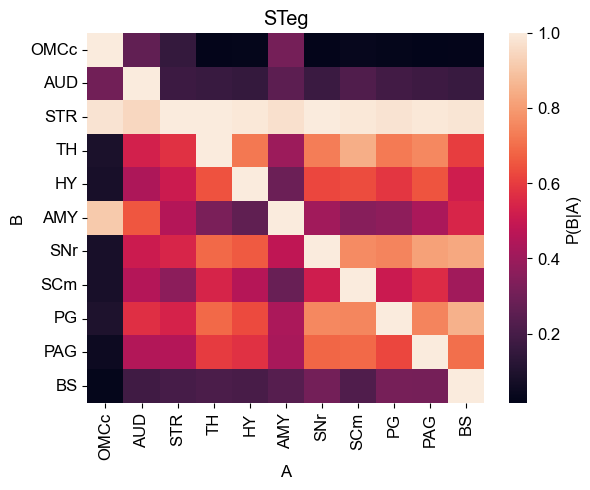

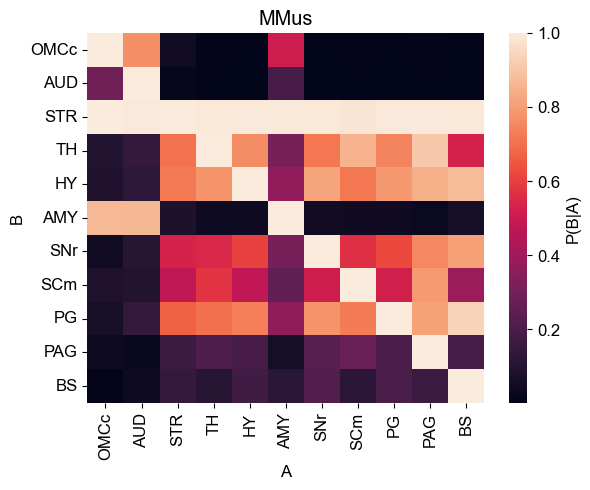

In [72]:
pab, areas = calc_PAB(st_pt_all)

pab_heatmap(pab, areas)
plt.title("STeg")
plt.show()

pab, areas = calc_PAB(mm_pt_all)

pab_heatmap(pab, areas)
plt.title("MMus")
plt.show()

## Motifs across all areas

## PAG proportions

In [98]:
st_pag = st_pt_all[st_pt_all["PAG"]>0].reset_index(drop=True)
st_pag = st_pag.drop("type", axis=1)

mm_pag = mm_pt_all[mm_pt_all["PAG"]>0].reset_index(drop=True)
mm_pag = mm_pag.drop("type", axis=1)

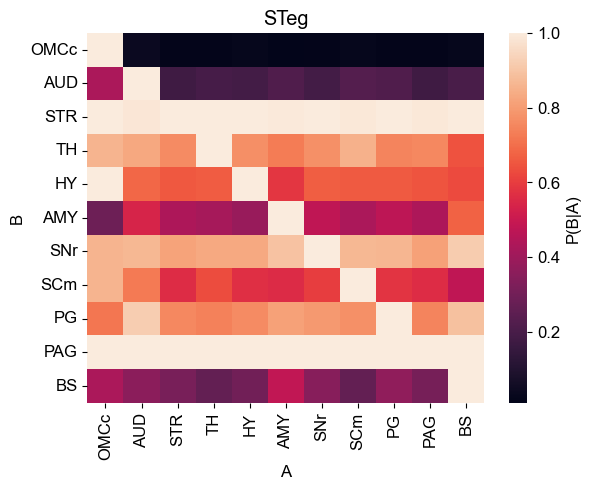

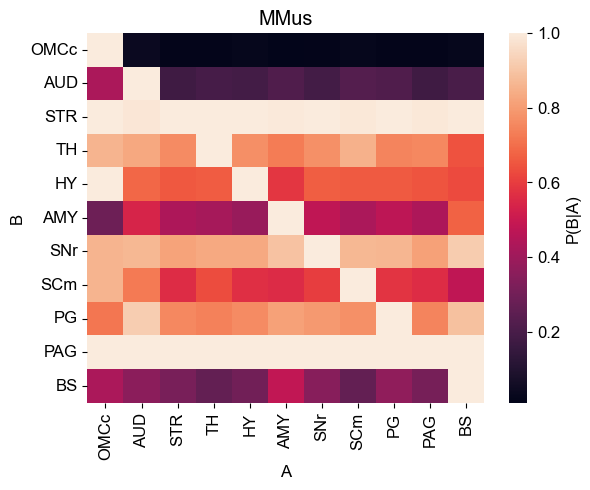

In [99]:
# visualize conditional probabilities
pab, areas = calc_PAB(st_pag, drop=["OMCi"])
pab_heatmap(pab, areas)
plt.title("STeg")
plt.show()

pab, areas = calc_PAB(st_pag, drop=["OMCi"])
pab_heatmap(pab, areas)
plt.title("MMus")
plt.show()

# plot by PAG node degree

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:240: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])


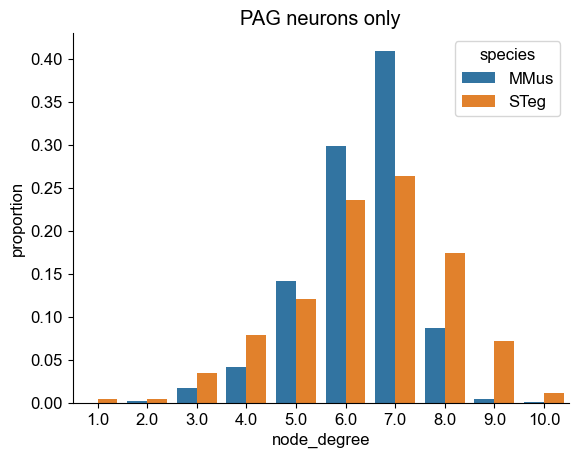

In [129]:
pag = [mm_pag, st_pag]
meta = pd.DataFrame({"mice":["all","all"], "species":["MMus", "STeg"], "dataset":["all","all"]})
node_prop = dfs_to_node_proportions(pag, drop=["OMCi"],meta=meta).reset_index(drop=True)

sns.barplot(node_prop, x="node_degree", y="proportion", hue="species", hue_order=["MMus", "STeg"])
plt.title("PAG neurons only")
ax = plt.gca()
ax.spines[["top","right"]].set_visible(False)
plt.show()


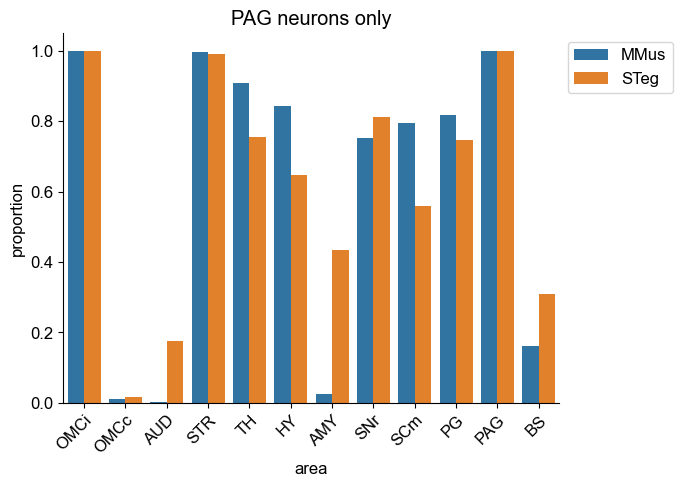

In [138]:
# calcualte proportion for area given PAG
st_pag_prop = st_pag.sum()/st_pag.shape[0]
st_pag_df = pd.DataFrame({"area":st_pag_prop.index, "proportion":st_pag_prop, "species":"STeg"}).reset_index(drop=True)

mm_pag_prop = mm_pag.sum()/mm_pag.shape[0]
mm_pag_df = pd.DataFrame({"area":mm_pag_prop.index, "proportion":mm_pag_prop, "species":"MMus"}).reset_index(drop=True)

plot_df = pd.concat([mm_pag_df, st_pag_df])

sns.barplot(plot_df, x="area", y="proportion", hue="species", hue_order=["MMus", "STeg"])
plt.title("PAG neurons only")
ax = plt.gca()
ax.spines[["top","right"]].set_visible(False)
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

# Independence analysis

## Look at motifs across all areas

In [140]:
st_pt_all.columns

Index(['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS', 'type'],
      dtype='object')

In [142]:
plot_areas = ['OMCc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']
motifs = df_to_motif_proportion(st_pt_all, areas=plot_areas).index
motif_strings = TF_to_motifs(motifs)

In [143]:
%%time
sp_pt_all = [st_pt_all, mm_pt_all]
sp = ["STeg", "MMus"]

# Estimate n-totals
n_totals = [estimate_n_total(sp_pt_all[i], plot_areas) for i in range(len(sp_pt_all))]

# Count obs motifs
n_obs_motifs = [df_to_motif_proportion(df, areas=plot_areas, proportion=False) for df in sp_pt_all]
motifs = n_obs_motifs[0].index

# convert to proportions using adjusted n_totals
p_obs_motifs = [n_obs_motifs[i]/n_totals[i] for i in range(len(n_totals))]

# calculate proportions based on independent bulk probabilities adjusted for n_total
p_calc_motifs = [df_to_calc_pab_proportions(df, motifs, adjust_total=True) for df in sp_pt_all]

motif_strings = TF_to_motifs(motifs)

# put into dataframe - note p_obs is adjusted for n_total
pt_motifs_df = []
for i in range(len(n_totals)):
    df = pd.DataFrame({"motifs":motif_strings, "n_shape":sp_pt_all[i].shape[0], "n_total":n_totals[i],
                  "n_obs":n_obs_motifs[i], "p_obs":p_obs_motifs[i], "p_calc":p_calc_motifs[i],
                  "species":sp[i]})
    pt_motifs_df.append(df)
pt_motifs_df = pd.concat(pt_motifs_df).reset_index(drop=True)

pt_motifs_df

CPU times: user 9.16 s, sys: 156 ms, total: 9.32 s
Wall time: 9.67 s


,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
0,OMCc_,981,981,0,0.000000,3.460889e-05,STeg
1,AUD_,981,981,0,0.000000,4.050912e-05,STeg
2,STR_,981,981,0,0.000000,5.382646e-03,STeg
3,TH_,981,981,0,0.000000,2.425650e-04,STeg
4,HY_,981,981,1,0.001019,1.897387e-04,STeg
...,...,...,...,...,...,...,...
4089,AMY_AUD_BS_HY_OMCc_PAG_PG_SCm_SNr_STR_,9259,9260,0,0.000000,5.093340e-08,MMus
4090,AMY_AUD_BS_HY_OMCc_PAG_PG_SCm_SNr_TH_,9259,9260,0,0.000000,1.921997e-09,MMus
4091,AMY_BS_HY_OMCc_PAG_PG_SCm_SNr_STR_TH_,9259,9260,0,0.000000,6.649780e-06,MMus
4092,AMY_AUD_BS_HY_PAG_PG_SCm_SNr_STR_TH_,9259,9260,0,0.000000,2.452728e-06,MMus


<Axes: xlabel='p_obs', ylabel='Count'>

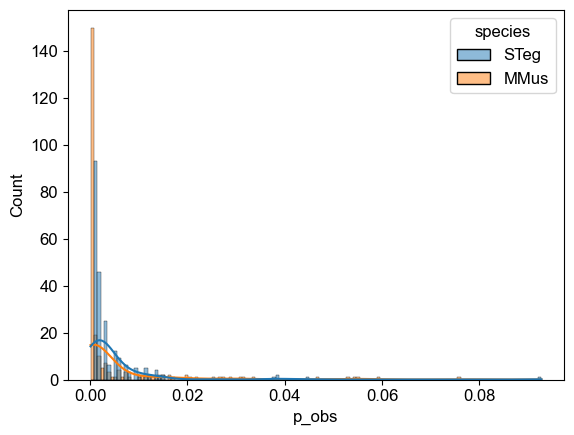

In [150]:
n0_pt_motifs = pt_motifs_df[pt_motifs_df["n_obs"]>0]

sns.histplot(n0_pt_motifs, x="p_obs", hue="species", kde=True)

In [154]:
# rank top pt_motifs

# steg


# mmus


mm_pt_motif = pt_motifs_df[pt_motifs_df["species"]=="MMus"]
st_pt_motif = pt_motifs_df[pt_motifs_df["species"]=="STeg"]

mm_pt_motif.sort_values(by="p_obs", ascending=False)[0:50]

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
3458,HY_PG_SCm_SNr_STR_TH_,9259,9260,701,0.075702,5.048533e-02,MMus
2194,HY_STR_TH_,9259,9260,549,0.059287,2.573813e-02,MMus
3836,HY_PAG_PG_SCm_SNr_STR_TH_,9259,9260,508,0.054860,9.681228e-03,MMus
2950,HY_PG_SNr_STR_TH_,9259,9260,502,0.054212,5.627287e-02,MMus
2485,HY_PG_STR_TH_,9259,9260,494,0.053348,5.052909e-02,MMus
2953,HY_PG_SCm_STR_TH_,9259,9260,436,0.047084,4.533229e-02,MMus
2497,PG_SCm_STR_TH_,9259,9260,310,0.033477,1.821252e-02,MMus
2993,BS_HY_PG_SNr_STR_,9259,9260,290,0.031317,3.939128e-03,MMus
2509,HY_PG_SNr_STR_,9259,9260,289,0.031210,2.405498e-02,MMus
2197,SCm_STR_TH_,9259,9260,266,0.028726,9.276955e-03,MMus


In [155]:
st_pt_motif.sort_values(by="p_obs", ascending=False)[0:50]

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
77,AMY_OMCc_STR_,981,981,91,0.092762,0.000787,STeg
32,AMY_STR_,981,981,44,0.044852,0.004396,STeg
233,AMY_AUD_OMCc_STR_,981,981,38,0.038736,0.000165,STeg
1789,HY_PAG_PG_SCm_SNr_STR_TH_,981,981,38,0.038736,0.003624,STeg
147,HY_STR_TH_,981,981,37,0.037717,0.006633,STeg
31,HY_STR_,981,981,25,0.025484,0.005285,STeg
1412,HY_PAG_SCm_SNr_STR_TH_,981,981,15,0.015291,0.003200,STeg
1411,HY_PG_SCm_SNr_STR_TH_,981,981,15,0.015291,0.004605,STeg
151,PG_STR_TH_,981,981,14,0.014271,0.007652,STeg
438,HY_PG_STR_TH_,981,981,14,0.014271,0.007513,STeg


## curate pt motifs


In [185]:
st_pt_all.sum()

OMCi                                                981.0
OMCc                                                149.0
AUD                                                 170.0
STR                                                 947.0
TH                                                  546.0
HY                                                  486.0
AMY                                                 441.0
SNr                                                 515.0
SCm                                                 350.0
PG                                                  521.0
PAG                                                 432.0
BS                                                  191.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object

In [187]:
plot_areas = ["PAG", "AMY", "HY"]
motifs = df_to_motif_proportion(st_pt_all, areas=plot_areas).index
motif_strings = TF_to_motifs(motifs)

# only keep neurons that have projection in plot_areas
st_pt_area = st_pt_all["PAG"] + st_pt_all["AMY"] + st_pt_all["HY"]
print("STeg neurons without proj to rois", (st_pt_area<1).sum())
st_pt_select = st_pt_all[st_pt_area>0].reset_index(drop=True)

# only keep neurons that have projection in plot_areas
mm_pt_area = mm_pt_all["PAG"] + mm_pt_all["AMY"] + mm_pt_all["HY"]
print("MMus neurons without proj to rois", (mm_pt_area<1).sum())
mm_pt_select = mm_pt_all[mm_pt_area>0].reset_index(drop=True)

STeg neurons without proj to rois 107
MMus neurons without proj to rois 1956


In [189]:
print(mm_pt_select.shape[0])
print(st_pt_select.shape[0])

7303
874


In [164]:
%%time
sp_pt_all = [st_pt_select, mm_pt_select]
sp = ["STeg", "MMus"]

# Estimate n-totals
n_totals = [estimate_n_total(sp_pt_all[i], plot_areas) for i in range(len(sp_pt_all))]

# Count obs motifs
n_obs_motifs = [df_to_motif_proportion(df, areas=plot_areas, proportion=False) for df in sp_pt_all]
motifs = n_obs_motifs[0].index

# convert to proportions using adjusted n_totals
p_obs_motifs = [n_obs_motifs[i]/n_totals[i] for i in range(len(n_totals))]

# calculate proportions based on independent bulk probabilities adjusted for n_total
p_calc_motifs = [df_to_calc_pab_proportions(df, motifs, adjust_total=True) for df in sp_pt_all]

motif_strings = TF_to_motifs(motifs)

# put into dataframe - note p_obs is adjusted for n_total
pt_motifs_df = []
for i in range(len(n_totals)):
    df = pd.DataFrame({"motifs":motif_strings, "n_shape":sp_pt_all[i].shape[0], "n_total":n_totals[i],
                  "n_obs":n_obs_motifs[i], "p_obs":p_obs_motifs[i], "p_calc":p_calc_motifs[i],
                  "species":sp[i]})
    pt_motifs_df.append(df)
pt_motifs_df = pd.concat(pt_motifs_df).reset_index(drop=True)

pt_motifs_df

CPU times: user 195 ms, sys: 9.48 ms, total: 205 ms
Wall time: 208 ms


,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
0,PAG_,977,1002,11,0.010978,0.018872,STeg
1,AMY_,977,1002,199,0.198603,0.019574,STeg
2,HY_,977,1002,65,0.064870,0.023453,STeg
3,PG_,977,1002,40,0.039920,0.026971,STeg
4,SNr_,977,1002,17,0.016966,0.026332,STeg
...,...,...,...,...,...,...,...
121,AMY_HY_PAG_SCm_SNr_,9243,9443,1,0.000106,0.000722,MMus
122,AMY_PAG_PG_SCm_SNr_,9243,9443,0,0.000000,0.000575,MMus
123,HY_PAG_PG_SCm_SNr_,9243,9443,660,0.069893,0.015844,MMus
124,AMY_HY_PG_SCm_SNr_,9243,9443,114,0.012072,0.007148,MMus


In [168]:
# rank order
st_pt_motif = pt_motifs_df[pt_motifs_df["species"]=="STeg"]
mm_pt_motif = pt_motifs_df[pt_motifs_df["species"]=="MMus"]

display(st_pt_motif.sort_values(by="p_obs", ascending=False).reset_index(drop=True)[0:50])
display(mm_pt_motif.sort_values(by="p_obs", ascending=False).reset_index(drop=True)[0:50])

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
0,AMY_,977,1002,199,0.198603,0.019574,STeg
1,HY_PAG_PG_SCm_SNr_,977,1002,69,0.068862,0.010929,STeg
2,HY_,977,1002,65,0.064870,0.023453,STeg
3,AMY_HY_PAG_PG_SNr_,977,1002,46,0.045908,0.016005,STeg
4,PG_,977,1002,40,0.039920,0.026971,STeg
5,AMY_HY_PAG_PG_SCm_SNr_,977,1002,38,0.037924,0.008591,STeg
6,AMY_PAG_PG_SCm_SNr_,977,1002,33,0.032934,0.009122,STeg
7,HY_PAG_PG_SNr_,977,1002,31,0.030938,0.020360,STeg
8,HY_PG_SNr_,977,1002,29,0.028942,0.026863,STeg
9,PAG_PG_SCm_SNr_,977,1002,25,0.024950,0.011604,STeg


,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
0,HY_PG_SNr_,9243,9443,1243,0.131632,0.097795,MMus
1,HY_PG_SCm_SNr_,9243,9443,1027,0.108758,0.084567,MMus
2,HY_PG_,9243,9443,782,0.082813,0.091481,MMus
3,HY_,9243,9443,779,0.082495,0.049327,MMus
4,HY_PAG_PG_SCm_SNr_,9243,9443,660,0.069893,0.015844,MMus
5,HY_PG_SCm_,9243,9443,515,0.054538,0.079107,MMus
6,SCm_,9243,9443,449,0.047548,0.018318,MMus
7,AMY_,9243,9443,448,0.047443,0.001791,MMus
8,PG_SCm_,9243,9443,376,0.039818,0.033973,MMus
9,PG_,9243,9443,359,0.038018,0.039287,MMus


In [173]:
# only look at motifs w/ >0.01 proportion observed
pt_motifs_select = pt_motifs_df[pt_motifs_df["p_obs"]>0.01].reset_index(drop=True)
pt_motifs_select

,motifs,n_shape,n_total,n_obs,p_obs,p_calc,species
0,PAG_,977,1002,11,0.010978,0.018872,STeg
1,AMY_,977,1002,199,0.198603,0.019574,STeg
2,HY_,977,1002,65,0.064870,0.023453,STeg
3,PG_,977,1002,40,0.039920,0.026971,STeg
4,SNr_,977,1002,17,0.016966,0.026332,STeg
5,HY_PAG_,977,1002,13,0.012974,0.017775,STeg
6,HY_PG_,977,1002,18,0.017964,0.025403,STeg
7,HY_SNr_,977,1002,20,0.019960,0.024801,STeg
8,HY_SCm_,977,1002,16,0.015968,0.012590,STeg
9,PG_SNr_,977,1002,14,0.013972,0.028522,STeg


In [176]:
# calculate fold changes obs/calc
pt_motifs_select["fc"] = pt_motifs_select["p_obs"]/pt_motifs_select["p_calc"]
pt_motifs_select["log2fc"] = np.log2(pt_motifs_select["fc"])

# calculate p-value
for i in range(pt_motifs_select.shape[0]):
    test = binomtest(pt_motifs_select.loc[i,"n_obs"], pt_motifs_select.loc[i,"n_total"], 
                     pt_motifs_select.loc[i,"p_calc"])
    pvalue = test.pvalue
    pt_motifs_select.loc[i, "pvalue"] = pvalue


pt_motifs_select["nlog10p"] = -1*np.log10(pt_motifs_select["pvalue"])


bonferroni = multipletests(pt_motifs_select["pvalue"], alpha=0.01, method="bonferroni")
pt_motifs_select["bf_pvals"] = bonferroni[1]
pt_motifs_select["nlog10_bfp"] = -1*np.log10(pt_motifs_select["bf_pvals"])


/Users/eisko/mambaforge/envs/MAPseq_231109/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eisko/mambaforge/envs/MAPseq_231109/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


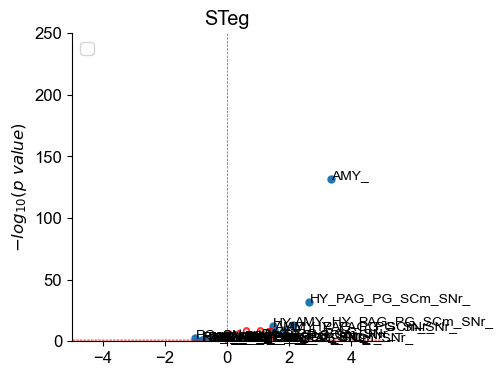

posx and posy should be finite values
posx and posy should be finite values


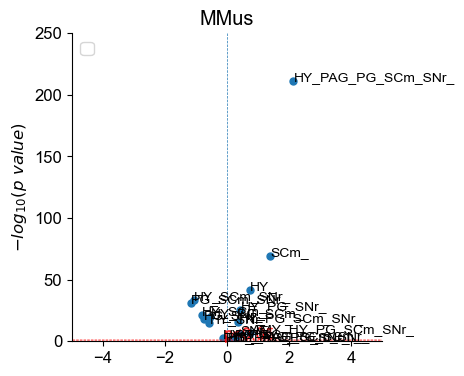

In [182]:

# plot as volcano plot

for spec in sp:
    plot_volcano(pt_motifs_select[pt_motifs_select["species"]==spec].reset_index(drop=True), 
                 x="log2fc", y="nlog10p",
                labels="motifs", xlim=(-5,5), ylim = (0,250))
    plt.title(spec)
    # plt.axline((-1,bf5), (1,bf5), color="red", linestyle="--")
    # plt.text(-3, bf5+1, "bf 0.05")
    # plt.axline((-1,bf1), (1,bf1), color="red", linestyle="--")
    # plt.text(-3, bf5+1, "bf 0.01")
    # plt.title(spec)
    plt.show()